In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nltk in c:\users\ende\anaconda3_new\envs\enve\lib\site-packages (3.8.1)



In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\ende\Desktop\10x\Week-4\Notebooks\GooglePlay.csv')

In [4]:
df.head(2)

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,Bank
0,manuhe wondimu,https://play-lh.googleusercontent.com/a-/ALV-U...,The previous version is much better than this ...,2,526,4.2,2021-01-01T21:50:49,NaN,NaN,4.2,CBE
1,Anwar,https://play-lh.googleusercontent.com/a-/ALV-U...,The good thing is its simplicity to undertake ...,3,4,4.4.0,2023-03-15T11:46:33,NaN,NaN,4.4.0,CBE


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Tokenize your reviews
df['tokenized_reviews'] = df['content'].apply(nltk.word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokenized_reviews'] = df['tokenized_reviews'].apply(lambda x: [word for word in x if word not in stop_words])

# Apply stemming
stemmer = PorterStemmer()
df['tokenized_reviews'] = df['tokenized_reviews'].apply(lambda x: [stemmer.stem(word) for word in x])


In [6]:
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,Bank,tokenized_reviews
0,manuhe wondimu,https://play-lh.googleusercontent.com/a-/ALV-U...,The previous version is much better than this ...,2,526,4.2,2021-01-01T21:50:49,NaN,NaN,4.2,CBE,"[the, previou, version, much, better, one, ., ..."
1,Anwar,https://play-lh.googleusercontent.com/a-/ALV-U...,The good thing is its simplicity to undertake ...,3,4,4.4.0,2023-03-15T11:46:33,NaN,NaN,4.4.0,CBE,"[the, good, thing, simplic, undertak, basic, f..."
2,eyob kifle,https://play-lh.googleusercontent.com/a-/ALV-U...,The updated app is attractive and is working v...,4,0,4.1,2020-07-25T17:14:21,NaN,NaN,4.1,CBE,"[the, updat, app, attract, work, well, ., forc..."
3,Tsegaye Getachew Alenka,https://play-lh.googleusercontent.com/a-/ALV-U...,Sometimes it brings a contradicting notificati...,3,720,5.0.4,2024-03-09T16:39:44,NaN,NaN,5.0.4,CBE,"[sometim, bring, contradict, notif, ., first, ..."
4,Surafel Genene,https://play-lh.googleusercontent.com/a-/ALV-U...,Good app but it fail to send on time the commi...,2,14,5.0.4,2024-05-12T12:34:54,NaN,NaN,5.0.4,CBE,"[good, app, fail, send, time, commiss, money, ..."


In [7]:
pip install textblob

  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
from textblob import TextBlob

# Calculate sentiment polarity and subjectivity
df['sentiment_polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [19]:
df.head(2)

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,Bank,tokenized_reviews,sentiment_polarity,sentiment_subjectivity
0,manuhe wondimu,https://play-lh.googleusercontent.com/a-/ALV-U...,The previous version is much better than this ...,2,526,4.2,2021-01-01T21:50:49,NaN,NaN,4.2,CBE,"[the, previou, version, much, better, one, ., ...",-0.118750,0.510417
1,Anwar,https://play-lh.googleusercontent.com/a-/ALV-U...,The good thing is its simplicity to undertake ...,3,4,4.4.0,2023-03-15T11:46:33,NaN,NaN,4.4.0,CBE,"[the, good, thing, simplic, undertak, basic, f...",0.141667,0.369792


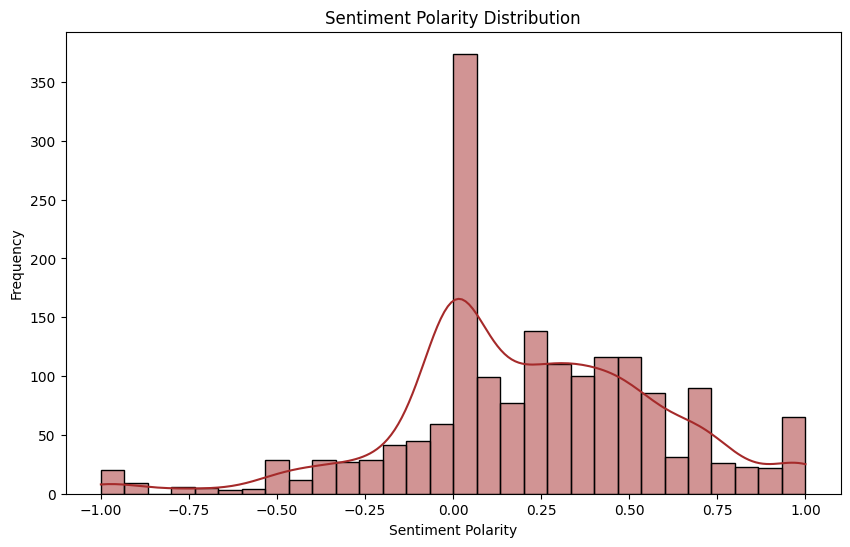

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_polarity'], bins=30, kde=True, color='Brown')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


C:\Users\ende\AppData\Local\Temp\ipykernel_7960\544866860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='viridis')


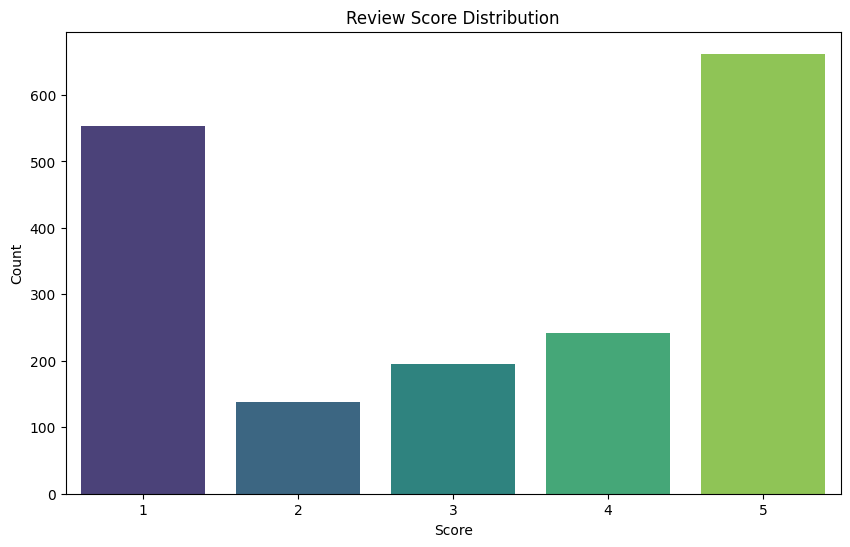

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Review Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


C:\Users\ende\AppData\Local\Temp\ipykernel_7960\1849393897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score', y='sentiment_polarity', data=df, palette='coolwarm')


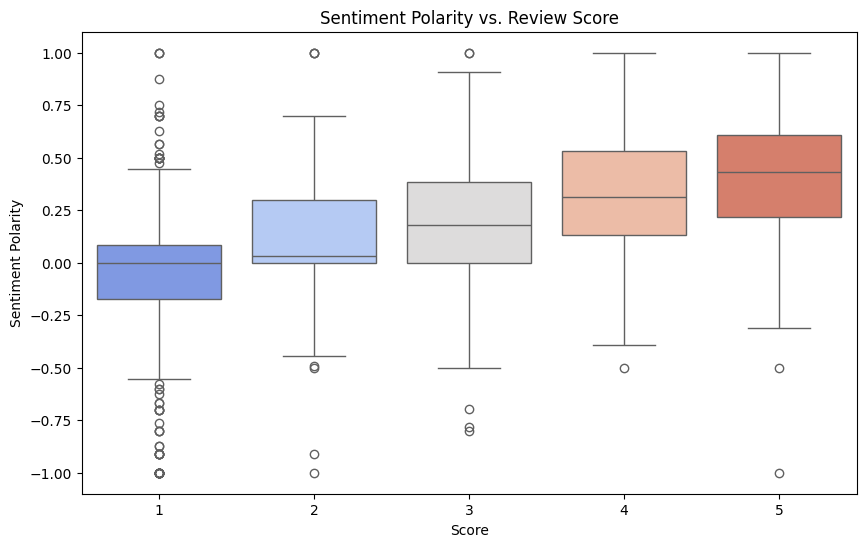

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='score', y='sentiment_polarity', data=df, palette='coolwarm')
plt.title('Sentiment Polarity vs. Review Score')
plt.xlabel('Score')
plt.ylabel('Sentiment Polarity')
plt.show()


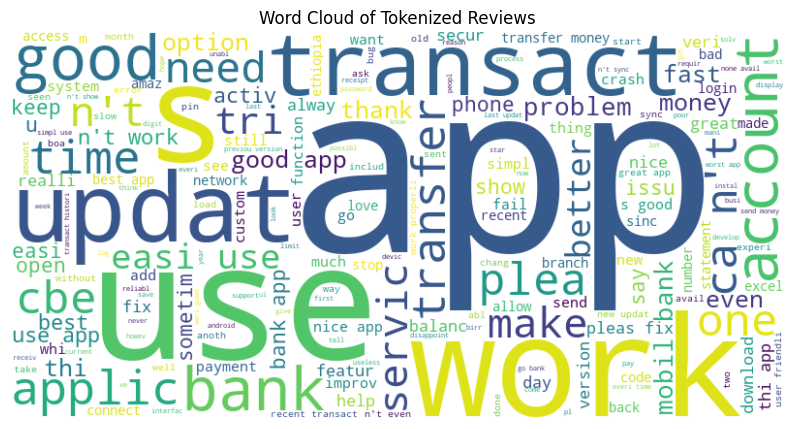

In [24]:
from wordcloud import WordCloud

all_words = ' '.join([' '.join(tokens) for tokens in df['tokenized_reviews']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokenized Reviews')
plt.show()


In [16]:
pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB 1.3 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.4 kB 393.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 726.2 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.4 kB 841.6 kB/s eta 0:00:01
   -------------------------------- ------- 245.8/301.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 965.4 kB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 965.4 kB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 965.4 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 620.8 kB/s eta 0:00:00


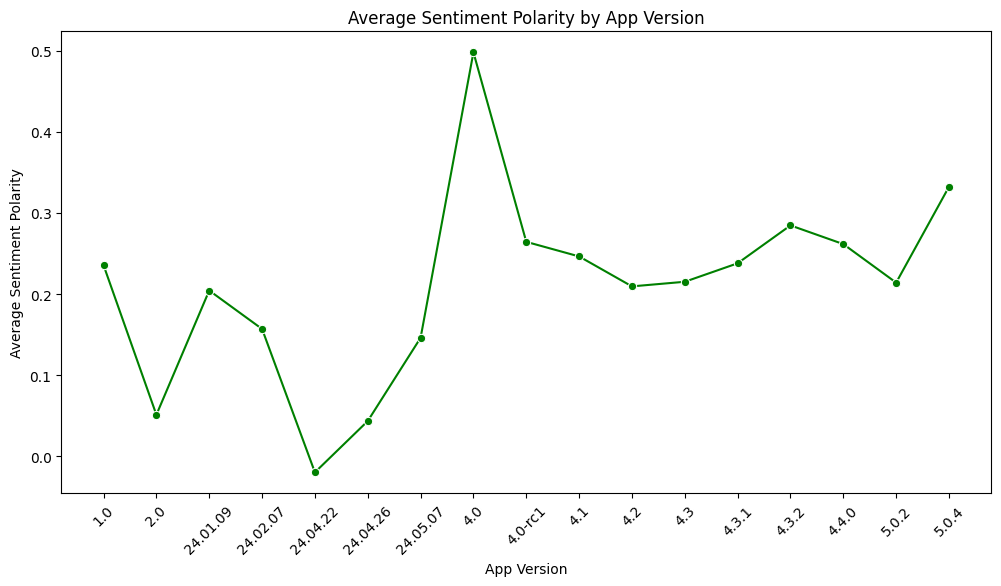

In [26]:
avg_polarity_by_version = df.groupby('appVersion')['sentiment_polarity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_polarity_by_version, x='appVersion', y='sentiment_polarity', marker='o', color='green')
plt.title('Average Sentiment Polarity by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()


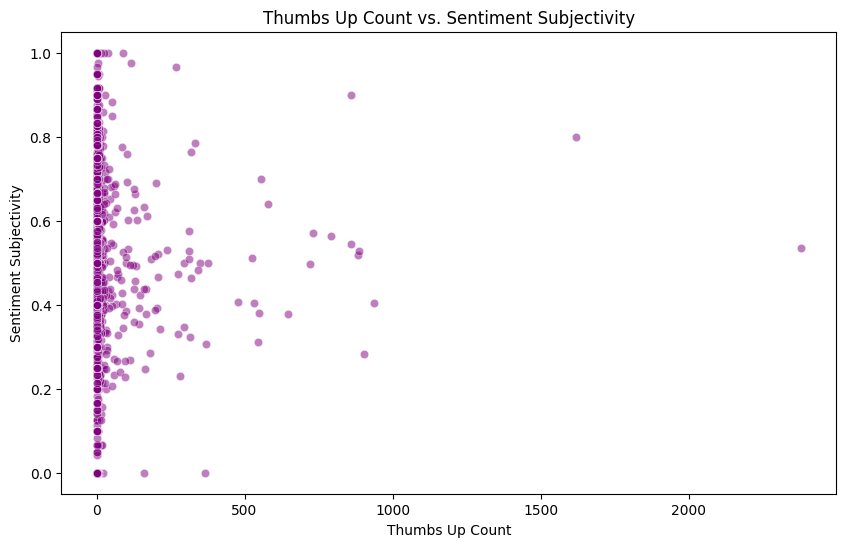

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='thumbsUpCount', y='sentiment_subjectivity', data=df, alpha=0.5, color='purple')
plt.title('Thumbs Up Count vs. Sentiment Subjectivity')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Sentiment Subjectivity')
plt.show()


In [29]:
positive_reviews = df[df['sentiment_polarity'] > 0.05]
print(f"Number of positive reviews: {len(positive_reviews)}")
negative_reviews = df[df['sentiment_polarity'] < -0.05]
print(f"Number of negative reviews: {len(negative_reviews)}")
neutral_reviews = df[(df['sentiment_polarity'] >= -0.05) & (df['sentiment_polarity'] <= 0.05)]
print(f"Number of neutral reviews: {len(neutral_reviews)}")


Number of positive reviews: 1108
Number of negative reviews: 267
Number of neutral reviews: 416


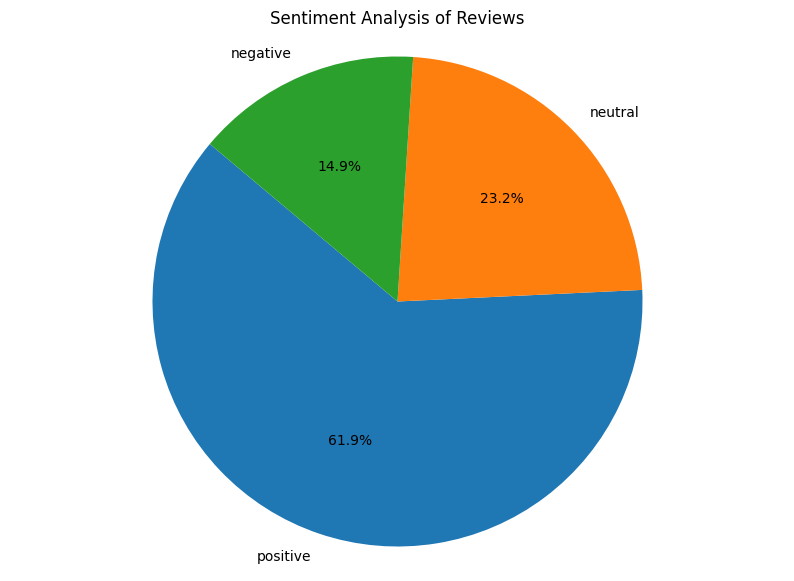

In [30]:
import matplotlib.pyplot as plt

# Categorize reviews
df['sentiment_category'] = df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Get counts of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Create pie chart
plt.figure(figsize=(10,7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sentiment Analysis of Reviews')
plt.show()


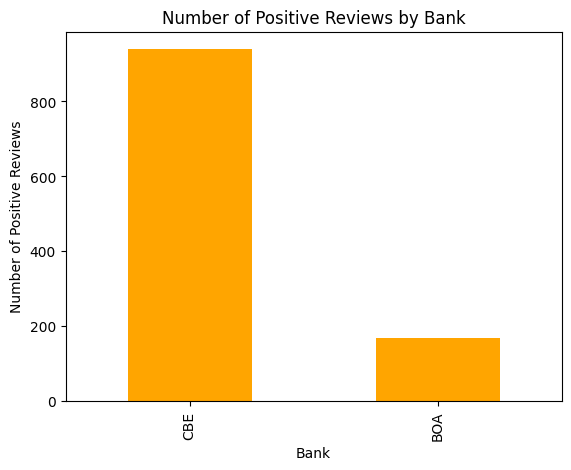

In [34]:
import matplotlib.pyplot as plt

# Categorize reviews
df['sentiment_category'] = df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Filter for positive reviews
positive_reviews = df[df['sentiment_category'] == 'positive']

# Count positive reviews by bank
positive_review_counts = positive_reviews['Bank'].value_counts()

# Create bar chart
positive_review_counts.plot(kind='bar', color='orange')
plt.title('Number of Positive Reviews by Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Positive Reviews')
plt.show()


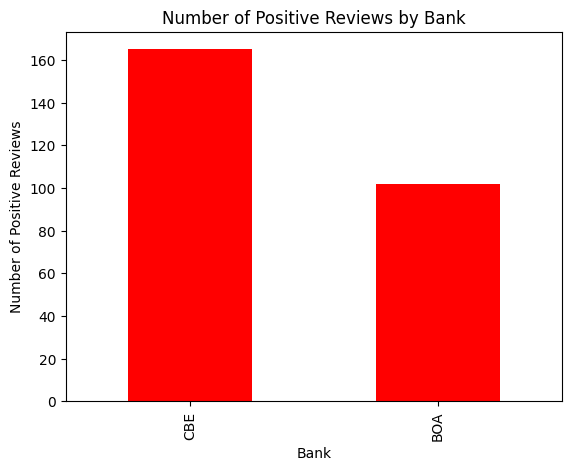

In [35]:
import matplotlib.pyplot as plt

# Categorize reviews
df['sentiment_category'] = df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Filter for positive reviews
positive_reviews = df[df['sentiment_category'] == 'negative']

# Count positive reviews by bank
positive_review_counts = positive_reviews['Bank'].value_counts()

# Create bar chart
positive_review_counts.plot(kind='bar', color='red')
plt.title('Number of Negative Reviews by Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Negative Reviews')
plt.show()


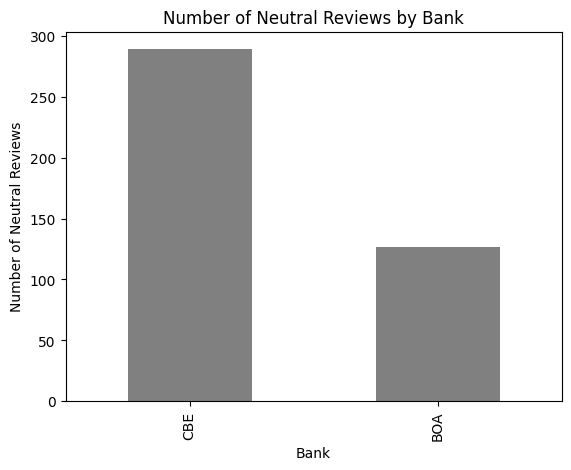

In [36]:
import matplotlib.pyplot as plt

# Categorize reviews
df['sentiment_category'] = df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Filter for positive reviews
positive_reviews = df[df['sentiment_category'] == 'neutral']

# Count positive reviews by bank
positive_review_counts = positive_reviews['Bank'].value_counts()

# Create bar chart
positive_review_counts.plot(kind='bar', color='gray')
plt.title('Number of Neutral Reviews by Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Neutral Reviews')
plt.show()
